## Comparison of different Fusion models (scaling, mean subtraction, add rest)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt

### Summary Graph of all models evaluated at their best hyperparameter. 

In [47]:
dataset_list = ['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']

# Get cross-validated single training sets models 
d_all_fusion = pd.DataFrame()

dfuse_1 = rm.comb_eval(models=['Fus06-bestSTD-avg'],methods=['L2reg'],eval_data=dataset_list,cerebellum='MNISymC3')
dfuse_1.train_dataset = 'scaleout'
d_all_fusion = pd.concat([d_all_fusion,dfuse_1]).reset_index(drop=True)

dfuse_1 = rm.comb_eval(models=['Nette2024-rep-addrest'],methods=['L2regression'],eval_data=dataset_list,cerebellum='SUIT3')
dfuse_1.train_dataset = 'scalein-mean-rest'
d_all_fusion = pd.concat([d_all_fusion,dfuse_1]).reset_index(drop=True)

dfuse_1 = rm.comb_eval(models=['Nette2024-rep'],methods=['L2regression'],eval_data=dataset_list,cerebellum='SUIT3')
dfuse_1.train_dataset = 'scalein-nomean-norest'
d_all_fusion = pd.concat([d_all_fusion,dfuse_1]).reset_index(drop=True)

d_jorn = pd.read_csv('../data/Nettekoven2024_model_evaluations.tsv',sep='\t')
d_jorn = d_jorn[d_jorn['train_dataset']=='Fusion']
d_jorn.train_dataset = 'Jorn'
d_all_fusion = pd.concat([d_all_fusion,d_jorn]).reset_index(drop=True)

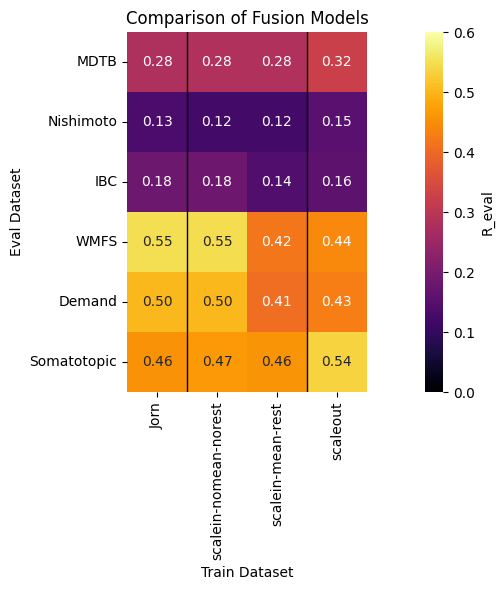

In [49]:
ds_order = ['MDTB', 'Nishimoto', 'IBC', 'WMFS', 'Demand', 'Somatotopic']
fus_order = ['Jorn', 'scalein-nomean-norest', 'scalein-mean-rest', 'scaleout']

plt.figure(figsize=(12,6))
V = pd.pivot_table(d_all_fusion,columns=['train_dataset'],index=['eval_dataset'],values=['R_eval'])
V = V.reindex(ds_order, axis=0)
V = V.reindex(fus_order, level=1, axis=1)

sns.heatmap(V.values, annot=True, fmt=".2f", cmap='inferno', vmin=0, vmax=0.6, 
            xticklabels=V.columns.get_level_values(1).values, 
            yticklabels=V.index.values, cbar_kws={'label': 'R_eval'}, square=True)
plt.yticks(rotation=0)
plt.axvline(1, color='k', linewidth=1)
plt.axvline(3, color='k', linewidth=1)

plt.title('Comparison of Fusion Models')
plt.xlabel('Train Dataset')
plt.ylabel('Eval Dataset')
plt.tight_layout()

In [56]:
dataset_list = ['MDTB', 'Languagelocalizer_cond', 'WMFS', 'Demand', 'Somatotopic', 'Nishimoto', 'IBC']
d = pd.DataFrame()

dfuse_1 = rm.comb_eval(models=['Fus06-bestSTD-avg'],methods=['L2reghalf'],eval_data=dataset_list,cerebellum='MNISymC3')
dfuse_1.train_dataset = 'half'
d = pd.concat([d,dfuse_1]).reset_index(drop=True)

dfuse_1 = rm.comb_eval(models=['Fus06-bestSTD-voxel'],methods=['L2reghalf'],eval_data=dataset_list,cerebellum='MNISymC3')
dfuse_1.train_dataset = 'half-voxel'
d = pd.concat([d,dfuse_1]).reset_index(drop=True)

dfuse_1 = rm.comb_eval(models=['Fus06-bestSTD-voxel-WTA'],methods=['L2reghalf'],eval_data=dataset_list,cerebellum='MNISymC3')
dfuse_1.train_dataset = 'half-voxel-WTA'
d = pd.concat([d,dfuse_1]).reset_index(drop=True)

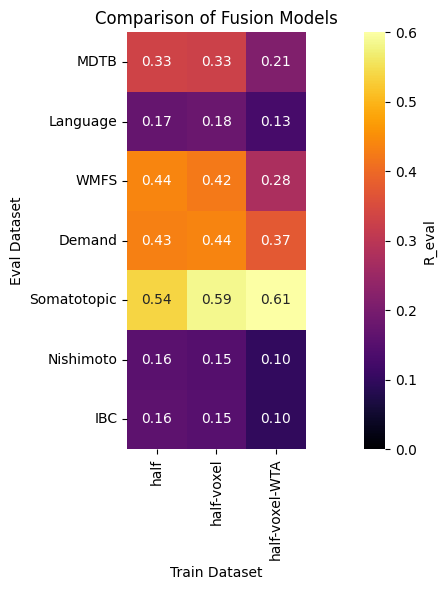

In [57]:
ds_order = ['MDTB', 'Language', 'WMFS', 'Demand', 'Somatotopic', 'Nishimoto', 'IBC']
fus_order = ['half', 'half-voxel', 'half-voxel-WTA']

plt.figure(figsize=(12,6))
V = pd.pivot_table(d,columns=['train_dataset'],index=['eval_dataset'],values=['R_eval'])
V = V.reindex(ds_order, axis=0)
V = V.reindex(fus_order, level=1, axis=1)

sns.heatmap(V.values, annot=True, fmt=".2f", cmap='inferno', vmin=0, vmax=0.6, 
            xticklabels=V.columns.get_level_values(1).values, 
            yticklabels=V.index.values, cbar_kws={'label': 'R_eval'}, square=True)
plt.yticks(rotation=0)

plt.title('Comparison of Fusion Models')
plt.xlabel('Train Dataset')
plt.ylabel('Eval Dataset')
plt.tight_layout()

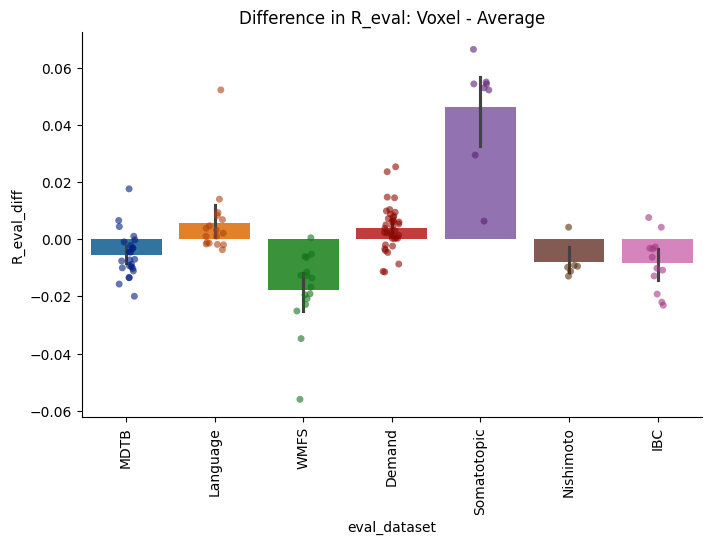

In [64]:
df_diff = pd.merge(d[d.train_dataset=='half-voxel'][['eval_dataset', 'eval_subj', 'R_eval']],
                   d[d.train_dataset=='half'][['eval_dataset', 'eval_subj', 'R_eval']],
                   on=['eval_dataset', 'eval_subj'],
                   suffixes=('_voxel', '_avg'))

df_diff['R_eval_diff'] = df_diff['R_eval_voxel'] - df_diff['R_eval_avg']

plt.figure(figsize=(8, 5))
sns.barplot(data=df_diff,x='eval_dataset',y='R_eval_diff', order=ds_order, hue='eval_dataset')
sns.stripplot(data=df_diff,x='eval_dataset',y='R_eval_diff',hue='eval_dataset', palette='dark', alpha=0.6, jitter=0.1)
plt.title('Difference in R_eval: Voxel - Average')
ax=plt.gca()
ax.set_xticks(np.arange(len(ds_order)))
ax.set_xticklabels(ds_order, rotation=90)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)